In [631]:
#%reset

In [664]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load the data as a Pandas Dataframe 

In [665]:
import os
path = os.getcwd() + '\data\ex1data1.txt'
data = pd.read_csv(path, header = None, names = ['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [666]:
data.tail()

,Population,Profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


## Prelminary Data Exploration 

In [667]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


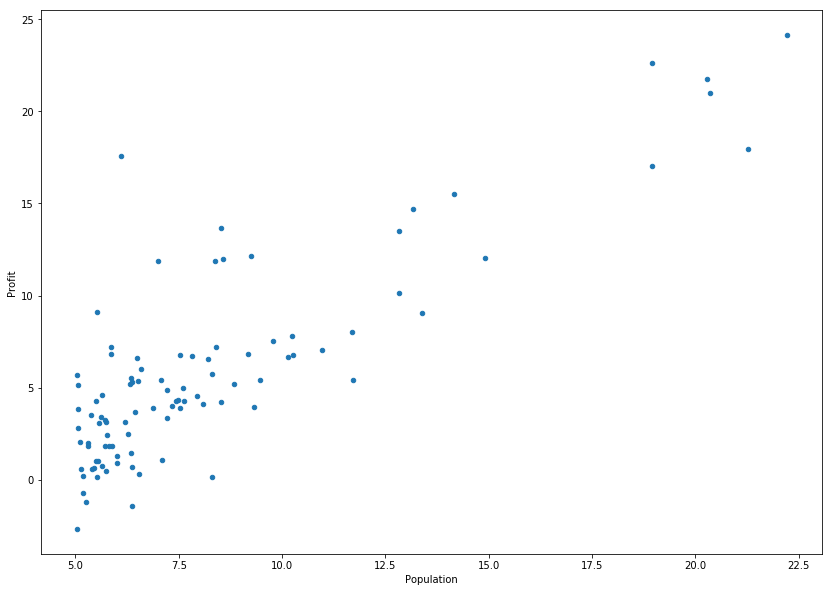

In [668]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(14,10));

## Linear Regression modeling using Gradient Descent approach

### Gradient Descent Cost function:

In [669]:
def GD_cost(x, y, theta):
    inner = np.power(((x * theta.T) - y) , 2)
    return np.sum(inner) / (2*len(x))

### Putting the data in the right format:

In [670]:
data.insert(0, 'ones', 1)

In [671]:
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [672]:
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros(x.shape[1]))

In [673]:
x.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [674]:
# Test if the data works on the GD_cost function
GD_cost(x, y, theta)

32.072733877455676

### Batch Gradient Descent Algorithm:

#### An inefficient way
def GD_estimates(x, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (x * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = GD_cost(x, y, theta)
        
    return theta, cost

#### Theta update rule (based on gradient of error at each iteration)

In [675]:
def Theta_update(x, y, theta, alpha):
    sum_term = ((x * theta.T) - y).T * x
    return theta - (alpha / len(x)) * sum_term

#### Initial values for the algorithm

In [676]:
theta = np.matrix([0, 0])
alpha = 0.01
iters = 1000

### Gradient Descent estimates

In [677]:
cost = []
def GD_estimates(x, y, theta, alpha, iters):
    for _ in range(iters):
        theta = Theta_update(x, y, theta, alpha)
        cost.append(GD_cost(x, y, theta))   
    return theta, cost              

In [678]:
thetahat, cost = GD_estimates(x, y, theta, alpha, iters)

thetahat

matrix([[-3.24140214,  1.1272942 ]])

In [679]:
GD_cost(x, y, thetahat)

4.5159555030789118

In [680]:
cost = np.array(cost)

cost[0:10]

array([ 6.73719046,  5.93159357,  5.90115471,  5.89522859,  5.89009494,
        5.88500416,  5.87993248,  5.87487909,  5.86984391,  5.86482687])

Text(0.5,1,'Predicted Profit vs. Population Size')

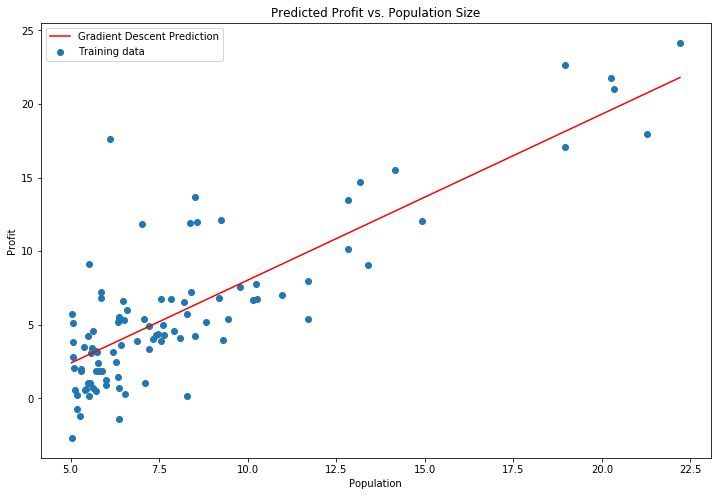

In [681]:
x_axis = np.linspace(data.Population.min(), data.Population.max(), 100)

yhat = thetahat[0, 0] + (thetahat[0, 1] * x_axis)

fig, ax = plt.subplots(figsize = (12,8))

ax.scatter(data.Population, data.Profit, label = 'Training data')

ax.plot(x_axis, yhat, 'r', label = 'Gradient Descent Prediction')

ax.legend(loc=2)

ax.set_xlabel('Population')

ax.set_ylabel('Profit')

ax.set_title('Predicted Profit vs. Population Size')

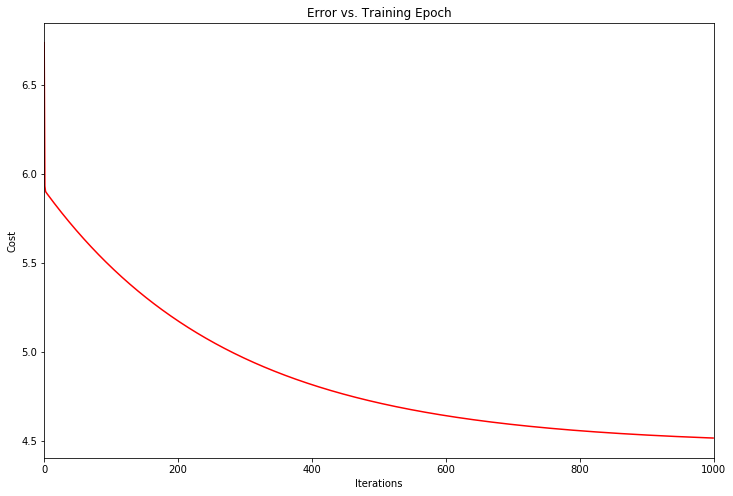

In [682]:
fig, ax = plt.subplots(figsize =(12,8));

ax.plot(np.arange(iters), cost, 'r');

ax.set_xlim(xmin=0)

ax.set_xlim(xmax=1000)

ax.set_xlabel('Iterations');

ax.set_ylabel('Cost');

ax.set_title('Error vs. Training Epoch');

## Utilizing scikit-learn's linear regression class

In [683]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [684]:
thetahat_skl = model.coef_

thetahat_skl

array([[ 0.        ,  1.19303364]])

In [685]:
model.predict(x).flatten(), (x * thetahat.T).A1

(array([  3.39377399,   2.6989512 ,   6.26719552,   4.45927234,
          3.09515767,   6.10530086,   5.02381586,   6.33818102,
          3.84247394,   2.13452698,   2.91727635,  13.00234766,
          2.94507404,   6.13572322,   2.833764  ,   2.52202431,
          3.69835548,   2.22460102,   3.77494824,   4.53992141,
          3.48802365,  20.28701109,   2.65409313,   3.65146926,
          2.74333205,  18.70624151,  11.40845471,   9.17628876,
         11.82363042,  22.59314512,   2.37050903,   3.96559502,
          7.13763287,   3.13333475,   5.90033768,   5.56903223,
          5.7629002 ,   2.79272364,  11.41799898,   3.68403908,
          2.55483273,   4.31527318,  10.07225703,   2.99243747,
          5.43934948,   4.56652606,   2.1531383 ,   3.02548451,
         10.06271276,   2.71553436,   5.09993141,   2.43648379,
          4.96118159,   5.17497322,   3.65946258,   3.69060076,
          3.58955081,   2.83257096,   7.21160096,   7.38268198,
          6.63321825,   2.28329828,  21.

In [686]:
MSE_skl, MSE_GD = mean_squared_error(y, model.predict(x)), mean_squared_error(y, (x * thetahat.T))

MSE_skl, MSE_GD

(8.9539427519503576, 9.0319110061578236)